# Simple example of encoding/decoding + visualization
In the notebook below we demonstrate how to seamlessly perform fractal encoding, decoding + show fractal blocks visualization with an end-to-end workflow:
1. Load an input image from a local path you provide.
2. Encode it using **fastfractal**.
3. Generate a **range-block visualization** (grid/quadtree partition overlay).
4. Decode the code back into an image.

The only required edit is setting `IMAGE_PATH` (by default path to grayscale lena) in the first code cell.

In [12]:
from __future__ import annotations

from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

from fastfractal.utils.visualize import visualize_blocks_from_file

IMAGE_PATH = Path(r"../tests/test-data/lena-gray.png")

OUT_DIR = Path("demo_out")
OUT_DIR.mkdir(parents=True, exist_ok=True)

ENCODED_PATH = OUT_DIR / "encoded.ffc"
BLOCKS_PATH = OUT_DIR / "blocks.png"
DECODED_PATH = OUT_DIR / "decoded.png"

assert IMAGE_PATH.exists(), f"Image not found: {IMAGE_PATH}"

PRESET = "quality"  # "speed" | "quality"

if PRESET == "speed":
    ENCODE_KWARGS = dict(
        max_block=16,
        min_block=8,
        use_quadtree=False,
        quantized=True,
        iterations_hint=8,
        block=8,
        stride=4,
        topk=8,
        entropy_thresh=0.0,
        max_domains=128,
    )
elif PRESET == "quality":
    ENCODE_KWARGS = dict(
        max_block=16,
        min_block=4,
        use_quadtree=True,
        quantized=True,
        block=8,
        stride=2,
        topk=32,
        entropy_thresh=0.0,
        max_domains=512,
    )
else:
    raise ValueError("PRESET must be 'speed' or 'quality'")

DECODE_ITERATIONS = 12

## Show original
Let's have an insight into the original image.

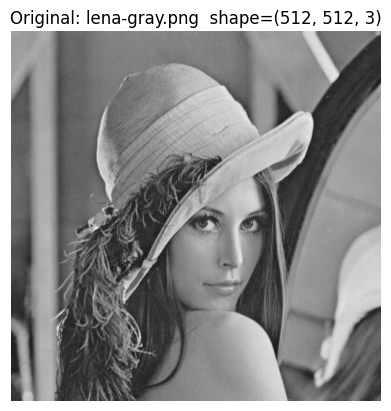

In [13]:
im0 = Image.open(IMAGE_PATH).convert("RGB")
arr0 = np.asarray(im0, dtype=np.uint8)

plt.figure()
plt.title(f"Original: {IMAGE_PATH.name}  shape={arr0.shape}")
plt.axis("off")
plt.imshow(arr0)
plt.show()

## Encode (paths-only)

Below we encode the image into its fractal compression format.


In [14]:
from fastfractal.core.encode import encode_to_file

encode_to_file(IMAGE_PATH, ENCODED_PATH, **ENCODE_KWARGS)

orig_bytes = int(arr0.size)
ffc_bytes = int(ENCODED_PATH.stat().st_size)
cr = float(orig_bytes) / float(max(1, ffc_bytes))

print(f"Saved: {ENCODED_PATH}")
print(f"Raw bytes (uint8): {orig_bytes}")
print(f"FFC bytes: {ffc_bytes}")
print(f"Compression ratio (raw/ffc): {cr:.3f}x")

Saved: demo_out\encoded.ffc
Raw bytes (uint8): 786432
FFC bytes: 45072
Compression ratio (raw/ffc): 17.448x


## Visualize range blocks / quadtree partition

Produces an image similar to the block-structure overlay you shared.

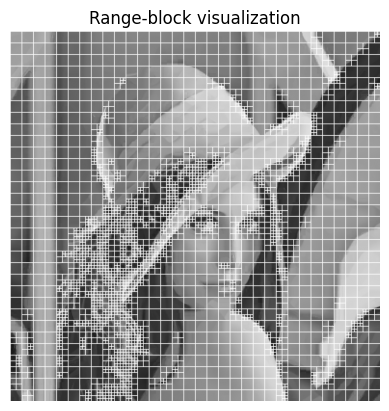

Saved: demo_out\blocks.png


In [15]:
visualize_blocks_from_file(
    ENCODED_PATH,
    BLOCKS_PATH,
    background="decode",
    grayscale=True,
    iterations=DECODE_ITERATIONS,
    thickness=1,
    alpha=1.0,
    upscale=2,
)

im_blocks = Image.open(BLOCKS_PATH).convert("L")
plt.figure()
plt.title("Range-block visualization")
plt.axis("off")
plt.imshow(im_blocks, cmap="gray", vmin=0, vmax=255)
plt.show()

print(f"Saved: {BLOCKS_PATH}")

## Decode (paths-only)

Decoding the compressed image (lossy compression).

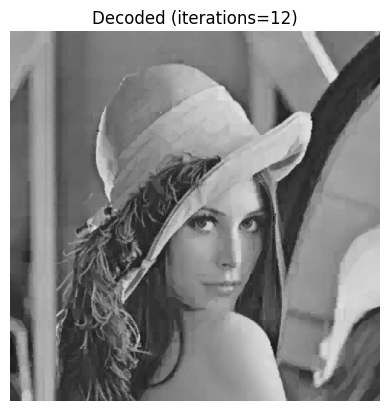

Saved: demo_out\decoded.png


In [16]:
from fastfractal.core.decode import decode_to_file

decode_to_file(ENCODED_PATH, DECODED_PATH, iterations=DECODE_ITERATIONS)

im_dec = Image.open(DECODED_PATH)
plt.figure()
plt.title(f"Decoded (iterations={DECODE_ITERATIONS})")
plt.axis("off")
plt.imshow(im_dec, cmap="gray", vmin=0, vmax=255)
plt.show()

print(f"Saved: {DECODED_PATH}")